In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
#now to lead the datasets
cocacola=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")


<Axes: >

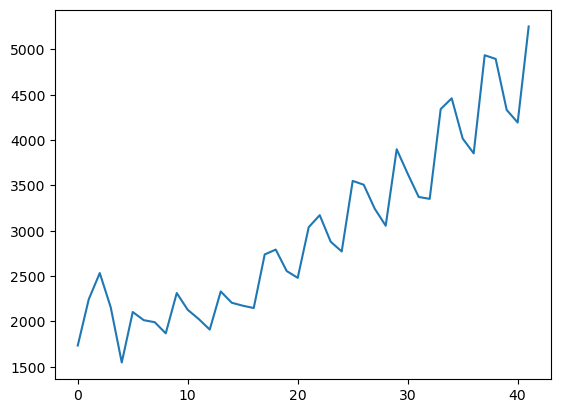

In [4]:
#Let us plot the dataset and its nature
cocacola.Sales.plot()

In [5]:
#Splitting the data into train and Test set data
#Scince we are working on quarterly dataset and in year there are 4 quators
#Test data=4 quators
#train data=38
Train=cocacola.head(38)
Test=cocacola.tail(4)

In [6]:
#Here we are considering performance paramerters as mean absolute
#percentage error
#rather than mean square error
#custom function is wriiten to calculate MPSE
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [7]:
#EAD which comprises identification of level, trends and seasonnality
#In order to seperate Trend and Seasonality moving average can be done
mv_pred=cocacola["Sales"].rolling(4).mean()
mv_pred.tail(4)

38    4425.50
39    4504.50
40    4589.50
41    4668.75
Name: Sales, dtype: float64

In [8]:
#This calculates a 4-period Moving Average for thr Sales column.
#It smooths the data by taking the mean of the last 4 quarters at each point,
#now let us calculate mean absolute percentage of these
#values
MAPE(mv_pred.tail(4),Test.Sales)


8.525442688640576

<Axes: >

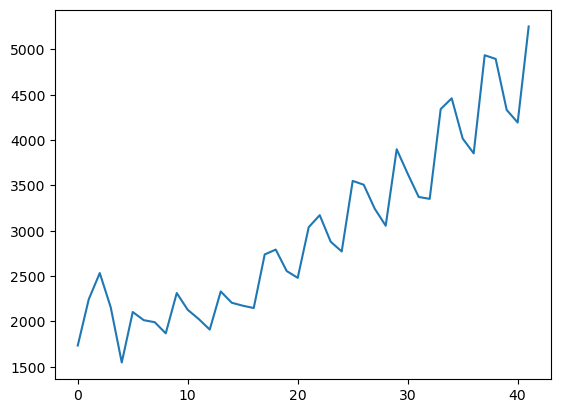

In [9]:
#Moving Average helps to extract trend & seasonality
#MAPE evaluates prediction accuracy
#If MAPE is low,the model is performing well
#moving average is predicting complete values,out of which last 4
#are considered as predicted values and last four values of Test.Sales
#basic puropse of moving average is deseasonalizing
cocacola.Sales.plot(label='org')

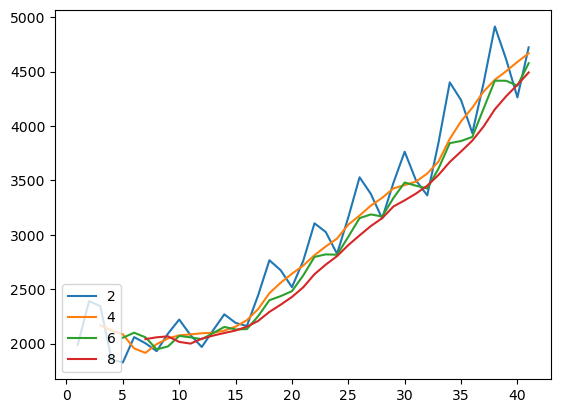

In [10]:
#This is original plot
#Now let us seperate out Trend and Seasonality
for i in range(2,9,2):
    #it will take window size 2,4,6,8
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc=3)


In [11]:
#you can  see i=4 and 8 are deseasonable plots
#Time series decomposition is the another technique of seperating data intermss seasonality

0            NaN
1            NaN
2     2143.76125
3     2102.81625
4     2020.31750
5     1934.98625
6     1954.73875
7     2021.04500
8     2061.44250
9     2080.07250
10    2089.65125
11    2097.03625
12    2109.00625
13    2137.17750
14    2185.28000
15    2266.00875
16    2390.30250
17    2511.33250
18    2600.67375
19    2679.78625
20    2764.73375
21    2852.52875
22    2929.28125
23    3029.47000
24    3135.26500
25    3222.85750
26    3303.96500
27    3383.09000
28    3441.84000
29    3473.10750
30    3526.25000
31    3618.62500
32    3778.00000
33    3962.50000
34    4105.75000
35    4242.75000
36    4371.25000
37    4465.00000
38    4547.00000
39    4629.12500
40           NaN
41           NaN
Name: trend, dtype: float64
0    -345.292740
1     287.696705
2     192.544080
3    -134.948045
4    -345.292740
5     287.696705
6     192.544080
7    -134.948045
8    -345.292740
9     287.696705
10    192.544080
11   -134.948045
12   -345.292740
13    287.696705
14    192.544080
15 

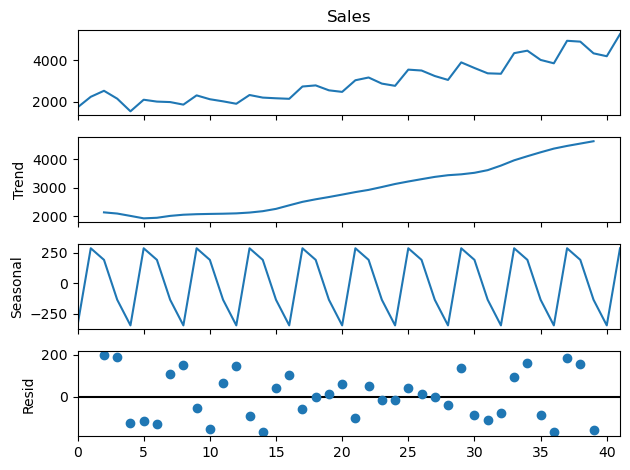

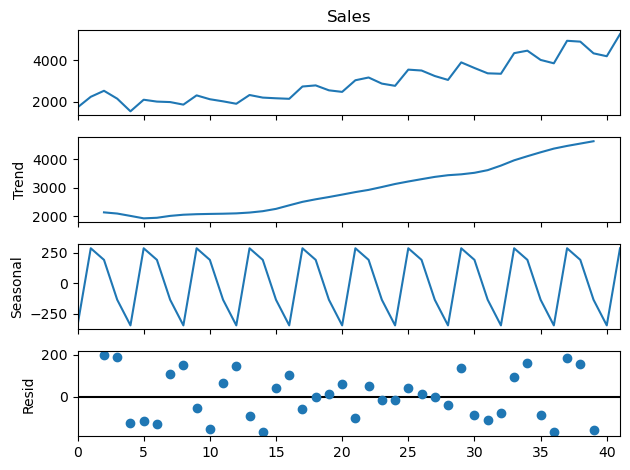

In [12]:
decompose_ts_add = seasonal_decompose(cocacola.Sales, model="additive", period=4)
print(decompose_ts_add.trend)
print(decompose_ts_add.seasonal)
print(decompose_ts_add.resid)
print(decompose_ts_add.observed)
decompose_ts_add.plot()

You can observe the difference between these plots

Now let us plot ACF plot to check the auto correlation

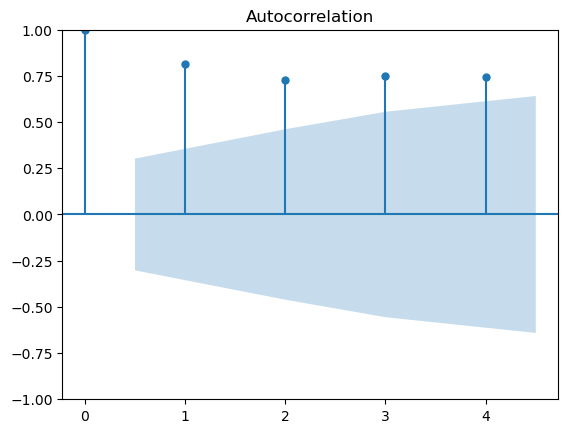

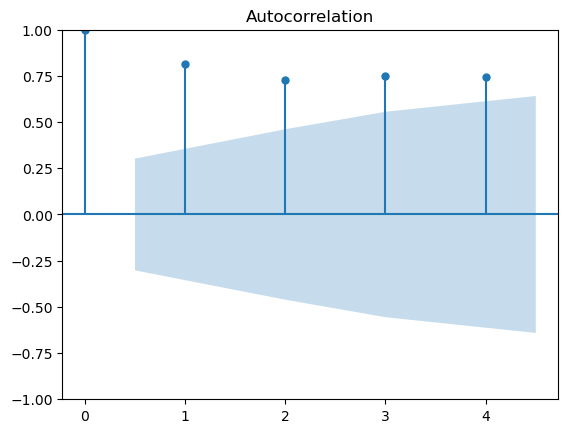

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales, lags=4)

we can observe the output in which r1,r2,r3 and r4 has higher correlation. This is all about EDA.

Let us apply data to daat driven models simple exponential method

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(Train['Sales']).fit()
pred_ses = ses_model.predict(start=Test.index[0], end = Test.index[-1])

#### Now calculate MAPE

In [17]:
MAPE(pred_ses, Test.Sales)

8.30789774829734

We are getting 8.30789774829734

Holts winter exponential smoothing

In [19]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0], end=Test.index[-1])
MAPE(pred_hw, Test.Sales)

9.80941173594165

Holts winter exponential smoothing with additive seasonality

In [20]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"], seasonal="add", trend="add", seasonal_periods=4).fit()
pred_hwe_model_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_model_add_add, Test.Sales)

1.5023826355347967

Holts winter exponential smoothing with multiplicative seasonality

In [21]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"], seasonal = "mul", trend = "add", seasonal_periods = 4).fit()
pred_hwe_model_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_model_mul_add, Test.Sales)

2.8863516520618875

Let us apply to complete data of cocacola

We have seen that hwe_model_add_add has got lowest MAPE, hence it is selected

In [23]:
hwe_model_add_add = ExponentialSmoothing(cocacola["Sales"],seasonal = "add", trend = "add", seasonal_periods = 4).fit()


import the new datasets for which predictions has to be done

In [25]:
new_data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [26]:
newdata_pred = hwe_model_add_add.predict(start = new_data.index[0], end = new_data.index[-1])

In [27]:
MAPE(newdata_pred, Test.Sales)

2.2625170207690255

In [28]:
newdata_pred


0     1769.272540
1     2223.443016
2     2331.592969
3     2281.072984
4     1842.584033
5     2202.706706
6     2314.574137
7     1880.343954
8     1431.410654
9     2170.807315
10    2323.597426
11    2127.209791
12    1742.415367
13    2258.266545
14    2245.093500
15    2155.452217
16    1939.215316
17    2450.385008
18    2509.781758
19    2622.611315
20    2494.745415
21    2980.983015
22    2963.327296
23    2919.613450
24    2836.934454
25    3342.115015
26    3463.870242
27    3264.876361
28    3191.085485
29    3783.209847
30    3803.389124
31    3477.617521
32    3305.803521
33    4062.313557
34    4035.187613
35    4017.894635
36    3996.102038
37    4807.189700
38    4804.950388
39    4489.157548
40    4344.242851
41    5254.271354
dtype: float64